# Sign Game Server

Game Plan:

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import string

from sign_game.ml.landmarks import Landmarks

In [6]:
landmark = Landmarks()

In [76]:
# !pip list

protobuf 3.11.0

## Dataset Preprocessing

In [14]:
# Dataset
df = pd.read_csv('../raw_data/images_ds.csv')

In [15]:
df.columns

Index(['Unnamed: 0', 'WRIST_X', 'WRIST_Y', 'WRIST_Z', 'THUMB_CMC_X',
       'THUMB_CMC_Y', 'THUMB_CMC_Z', 'THUMB_MCP_X', 'THUMB_MCP_Y',
       'THUMB_MCP_Z', 'THUMB_IP_X', 'THUMB_IP_Y', 'THUMB_IP_Z', 'THUMB_TIP_X',
       'THUMB_TIP_Y', 'THUMB_TIP_Z', 'INDEX_FINGER_MCP_X',
       'INDEX_FINGER_MCP_Y', 'INDEX_FINGER_MCP_Z', 'INDEX_FINGER_PIP_X',
       'INDEX_FINGER_PIP_Y', 'INDEX_FINGER_PIP_Z', 'INDEX_FINGER_DIP_X',
       'INDEX_FINGER_DIP_Y', 'INDEX_FINGER_DIP_Z', 'INDEX_FINGER_TIP_X',
       'INDEX_FINGER_TIP_Y', 'INDEX_FINGER_TIP_Z', 'MIDDLE_FINGER_MCP_X',
       'MIDDLE_FINGER_MCP_Y', 'MIDDLE_FINGER_MCP_Z', 'MIDDLE_FINGER_PIP_X',
       'MIDDLE_FINGER_PIP_Y', 'MIDDLE_FINGER_PIP_Z', 'MIDDLE_FINGER_DIP_X',
       'MIDDLE_FINGER_DIP_Y', 'MIDDLE_FINGER_DIP_Z', 'MIDDLE_FINGER_TIP_X',
       'MIDDLE_FINGER_TIP_Y', 'MIDDLE_FINGER_TIP_Z', 'RING_FINGER_MCP_X',
       'RING_FINGER_MCP_Y', 'RING_FINGER_MCP_Z', 'RING_FINGER_PIP_X',
       'RING_FINGER_PIP_Y', 'RING_FINGER_PIP_Z', 'RING_FINGER

In [16]:
df = df.drop(columns=df.columns[[0, -1]], axis=1)
df.columns

Index(['WRIST_X', 'WRIST_Y', 'WRIST_Z', 'THUMB_CMC_X', 'THUMB_CMC_Y',
       'THUMB_CMC_Z', 'THUMB_MCP_X', 'THUMB_MCP_Y', 'THUMB_MCP_Z',
       'THUMB_IP_X', 'THUMB_IP_Y', 'THUMB_IP_Z', 'THUMB_TIP_X', 'THUMB_TIP_Y',
       'THUMB_TIP_Z', 'INDEX_FINGER_MCP_X', 'INDEX_FINGER_MCP_Y',
       'INDEX_FINGER_MCP_Z', 'INDEX_FINGER_PIP_X', 'INDEX_FINGER_PIP_Y',
       'INDEX_FINGER_PIP_Z', 'INDEX_FINGER_DIP_X', 'INDEX_FINGER_DIP_Y',
       'INDEX_FINGER_DIP_Z', 'INDEX_FINGER_TIP_X', 'INDEX_FINGER_TIP_Y',
       'INDEX_FINGER_TIP_Z', 'MIDDLE_FINGER_MCP_X', 'MIDDLE_FINGER_MCP_Y',
       'MIDDLE_FINGER_MCP_Z', 'MIDDLE_FINGER_PIP_X', 'MIDDLE_FINGER_PIP_Y',
       'MIDDLE_FINGER_PIP_Z', 'MIDDLE_FINGER_DIP_X', 'MIDDLE_FINGER_DIP_Y',
       'MIDDLE_FINGER_DIP_Z', 'MIDDLE_FINGER_TIP_X', 'MIDDLE_FINGER_TIP_Y',
       'MIDDLE_FINGER_TIP_Z', 'RING_FINGER_MCP_X', 'RING_FINGER_MCP_Y',
       'RING_FINGER_MCP_Z', 'RING_FINGER_PIP_X', 'RING_FINGER_PIP_Y',
       'RING_FINGER_PIP_Z', 'RING_FINGER_DIP_X', 'RING

In [17]:
df.head()

,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,THUMB_IP_X,...,PINKY_PIP_X,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z,TARGET
0,0.464909,0.708310,-5.075436e-07,0.555220,0.661323,-0.030122,0.611244,0.556989,-0.037128,0.628575,...,0.420475,0.517954,-0.068963,0.438464,0.582875,-0.067767,0.449238,0.623481,-0.053324,A
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,0.428278,0.524772,-2.572420e-07,0.484400,0.516362,-0.018880,0.532799,0.455504,-0.020887,0.545799,...,0.438880,0.360585,-0.026516,0.432223,0.408768,-0.022789,0.426714,0.444198,-0.011816,A
3,0.424784,0.526288,-2.787659e-07,0.482184,0.515636,-0.018121,0.529932,0.453517,-0.020017,0.542437,...,0.436482,0.355436,-0.025730,0.430714,0.406064,-0.021307,0.425438,0.442749,-0.009893,A
4,0.417284,0.526785,-2.808050e-07,0.475789,0.512959,-0.018400,0.523456,0.451368,-0.021122,0.536454,...,0.430234,0.355039,-0.027363,0.425070,0.405152,-0.022343,0.419382,0.441459,-0.010160,A


In [18]:
df = df.dropna()

In [19]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']

In [20]:
X

,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,THUMB_IP_X,...,PINKY_MCP_Z,PINKY_PIP_X,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z
0,0.464909,0.708310,-5.075436e-07,0.555220,0.661323,-0.030122,0.611244,0.556989,-0.037128,0.628575,...,-0.029359,0.420475,0.517954,-0.068963,0.438464,0.582875,-0.067767,0.449238,0.623481,-0.053324
2,0.428278,0.524772,-2.572420e-07,0.484400,0.516362,-0.018880,0.532799,0.455504,-0.020887,0.545799,...,-0.003415,0.438880,0.360585,-0.026516,0.432223,0.408768,-0.022789,0.426714,0.444198,-0.011816
3,0.424784,0.526288,-2.787659e-07,0.482184,0.515636,-0.018121,0.529932,0.453517,-0.020017,0.542437,...,-0.003378,0.436482,0.355436,-0.025730,0.430714,0.406064,-0.021307,0.425438,0.442749,-0.009893
4,0.417284,0.526785,-2.808050e-07,0.475789,0.512959,-0.018400,0.523456,0.451368,-0.021122,0.536454,...,-0.004455,0.430234,0.355039,-0.027363,0.425070,0.405152,-0.022343,0.419382,0.441459,-0.010160
5,0.407313,0.531166,-2.932872e-07,0.466389,0.513676,-0.017403,0.512521,0.454263,-0.020262,0.525556,...,-0.006389,0.415865,0.357147,-0.029625,0.411639,0.406526,-0.024316,0.407199,0.442553,-0.011872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10252,0.533676,0.776449,-3.744521e-07,0.648090,0.689585,-0.035344,0.696169,0.497571,-0.041194,0.581502,...,-0.066617,0.311819,0.434638,-0.117362,0.374044,0.528436,-0.086111,0.376163,0.563470,-0.056843
10253,0.525096,0.791150,-5.785828e-07,0.631849,0.688886,-0.086939,0.657933,0.506302,-0.100606,0.545174,...,-0.048926,0.303805,0.448928,-0.115121,0.361184,0.540457,-0.086729,0.374162,0.580226,-0.049399
10254,0.557058,0.779061,-7.525379e-08,0.659453,0.672813,-0.032059,0.694955,0.463484,-0.047359,0.610756,...,-0.085864,0.364013,0.426935,-0.144861,0.432232,0.519041,-0.110905,0.414925,0.565103,-0.075401
10255,0.493840,0.783688,-2.974200e-07,0.623410,0.710791,-0.034583,0.699999,0.522675,-0.057727,0.646471,...,-0.076228,0.382377,0.414262,-0.150913,0.432052,0.512384,-0.124421,0.403262,0.553919,-0.088929


In [21]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
X_transformed

array([[ 0.23751972, -0.0139552 , -0.88278192, ...,  0.52030616,
         0.82348085,  0.03106804],
       [ 0.00977499, -1.05796301, -0.5022163 , ...,  0.35614805,
        -0.16040584,  0.76802382],
       [-0.01194414, -1.04933837, -0.53494188, ...,  0.34685189,
        -0.16835986,  0.80216893],
       ...,
       [ 0.81042199,  0.38849754, -0.22551634, ...,  0.27022965,
         0.50310869, -0.36088862],
       [ 0.41738529,  0.41481391, -0.56330411, ...,  0.18523284,
         0.44173188, -0.60107977],
       [ 0.31327764,  0.4798252 , -0.59373828, ..., -0.06837295,
         0.53600717, -0.17353965]])

In [22]:
y.value_counts()

B    587
A    544
E    518
F    464
C    425
D    416
H    408
O    400
I    391
W    387
L    387
V    376
G    369
K    359
Y    353
X    346
R    344
U    338
S    333
T    333
N    331
Q    289
P    273
M    266
J     70
Z     70
Name: TARGET, dtype: int64

In [23]:
# Encoding letters to numerical, A-Z = 0-25
y = pd.Categorical(y)

In [24]:
y.dtype

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
                  'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
                  'Y', 'Z'],
, ordered=False)

In [25]:
cat_list = list(y.categories)
cat_list

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [26]:
y = y.codes
display(len(y))
y

9377

array([ 0,  0,  0, ..., 25, 25, 25], dtype=int8)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.2, random_state=42)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7501, 63), (7501,), (1876, 63), (1876,))

In [29]:
classes = len(cat_list)
print(classes)

26


In [30]:
X_train = np.reshape(np.array(X_train), (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(np.array(X_test), (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape, X_test.shape)

(7501, 63, 1) (1876, 63, 1)


## CNN Model

### Original CNN

In [23]:
# Architecture
# model = models.Sequential()
# model.add(layers.Conv1D(filters=512, kernel_size=7, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.Conv1D(filters=512, kernel_size=7, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=256, kernel_size=5, strides=1, padding='causal', activation='relu'))
# model.add(layers.Conv1D(filters=256, kernel_size=5, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax')) 
#accuracy: 0.89

### Reduced CNN 1

In [24]:
# model = models.Sequential()
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax'))
# accuracy: 0.71

### Reduced CNN 2

In [ ]:
# model = models.Sequential()
# model.add(layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=128, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax'))
# accuracy: 0.81

### Reduced CNN 3

In [42]:
model = models.Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=128, kernel_size=3, strides=1, padding='causal', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='causal', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))
# accuracy: 0.86

### Reduced CNN 4

In [31]:
model = models.Sequential()
model.add(layers.Conv1D(filters=16, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='causal', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))

In [32]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 63, 16)            64        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 16)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 31, 32)            1568      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 32)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 15, 64)            6208      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 7, 64)            0

In [34]:
es = EarlyStopping(patience=10, restore_best_weights=True)

In [35]:
history = model.fit(X_train, 
                    y_train,
                    epochs=500, 
                    validation_split=0.3, 
                    callbacks=es)

Epoch 1/500


2023-03-09 16:48:41.230947: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


165/165 [==============================] - 1s 3ms/step - loss: 2.5868 - accuracy: 0.2680 - val_loss: 1.5473 - val_accuracy: 0.5247
Epoch 2/500
165/165 [==============================] - 0s 2ms/step - loss: 1.1934 - accuracy: 0.6232 - val_loss: 0.8248 - val_accuracy: 0.7503
Epoch 3/500
165/165 [==============================] - 0s 2ms/step - loss: 0.7358 - accuracy: 0.7644 - val_loss: 0.6439 - val_accuracy: 0.8028
Epoch 4/500
165/165 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.8229 - val_loss: 0.4722 - val_accuracy: 0.8512
Epoch 5/500
165/165 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8590 - val_loss: 0.3991 - val_accuracy: 0.8832
Epoch 6/500
165/165 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8811 - val_loss: 0.3238 - val_accuracy: 0.9080
Epoch 7/500
165/165 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8907 - val_loss: 0.3258 - val_accuracy: 0.9023
Epoch 8/500

In [36]:
model.evaluate(X_test, y_test)

59/59 [==============================] - 0s 654us/step - loss: 0.2511 - accuracy: 0.9371


[0.25107088685035706, 0.9371002316474915]

## Predict

In [37]:
y_true = y_test
y_true

array([ 4, 10, 10, ..., 14,  4, 12], dtype=int8)

In [38]:
y_pred = model.predict(X_test)
y_pred

59/59 [==============================] - 0s 572us/step


array([[2.47412890e-09, 1.32455225e-05, 1.06240013e-05, ...,
        1.80723276e-07, 1.97443728e-09, 1.23228836e-12],
       [1.99250864e-14, 6.13561535e-10, 2.32119705e-11, ...,
        2.68109941e-15, 1.99701333e-14, 2.84829155e-17],
       [7.11290158e-14, 2.48924340e-12, 8.79876650e-15, ...,
        1.00682243e-15, 2.80537736e-14, 3.13967770e-16],
       ...,
       [4.05977064e-14, 5.33340351e-11, 1.36212935e-03, ...,
        2.41720943e-14, 7.55491210e-13, 4.01412345e-23],
       [3.51847689e-07, 1.35095064e-08, 2.53815210e-06, ...,
        1.86013040e-07, 1.18506831e-08, 2.09869025e-10],
       [3.22457403e-08, 2.91619529e-08, 1.06523807e-07, ...,
        9.40626342e-06, 8.29352642e-10, 2.27734684e-08]], dtype=float32)

In [39]:
preds = [cat_list[np.argmax(pred)] for pred in y_pred]
preds

['E',
 'K',
 'K',
 'E',
 'P',
 'W',
 'A',
 'F',
 'U',
 'S',
 'A',
 'W',
 'S',
 'G',
 'A',
 'G',
 'M',
 'C',
 'L',
 'T',
 'X',
 'D',
 'G',
 'I',
 'B',
 'L',
 'V',
 'W',
 'A',
 'W',
 'W',
 'T',
 'J',
 'A',
 'M',
 'I',
 'N',
 'M',
 'P',
 'E',
 'C',
 'I',
 'X',
 'E',
 'Q',
 'X',
 'F',
 'N',
 'A',
 'L',
 'B',
 'V',
 'A',
 'S',
 'K',
 'N',
 'D',
 'F',
 'I',
 'N',
 'I',
 'R',
 'X',
 'H',
 'A',
 'S',
 'G',
 'R',
 'U',
 'D',
 'L',
 'I',
 'B',
 'B',
 'A',
 'A',
 'N',
 'B',
 'E',
 'O',
 'H',
 'A',
 'C',
 'X',
 'R',
 'X',
 'T',
 'W',
 'E',
 'Y',
 'P',
 'R',
 'B',
 'T',
 'C',
 'Q',
 'V',
 'W',
 'B',
 'Q',
 'T',
 'S',
 'F',
 'G',
 'S',
 'L',
 'O',
 'B',
 'F',
 'O',
 'L',
 'B',
 'E',
 'S',
 'E',
 'W',
 'H',
 'R',
 'C',
 'K',
 'A',
 'D',
 'L',
 'Q',
 'W',
 'Q',
 'B',
 'U',
 'B',
 'S',
 'B',
 'W',
 'F',
 'E',
 'W',
 'S',
 'D',
 'I',
 'O',
 'O',
 'T',
 'I',
 'Y',
 'U',
 'A',
 'P',
 'A',
 'G',
 'N',
 'K',
 'D',
 'H',
 'D',
 'B',
 'Y',
 'R',
 'X',
 'A',
 'L',
 'D',
 'D',
 'Q',
 'T',
 'K',
 'L',
 'T',
 'A'

In [40]:
actual = [cat_list[act] for act in y_true]

In [41]:
actual

['E',
 'K',
 'K',
 'E',
 'P',
 'W',
 'A',
 'F',
 'U',
 'S',
 'A',
 'W',
 'S',
 'G',
 'A',
 'G',
 'N',
 'C',
 'L',
 'T',
 'X',
 'D',
 'E',
 'I',
 'B',
 'L',
 'V',
 'W',
 'A',
 'W',
 'B',
 'T',
 'J',
 'A',
 'M',
 'I',
 'N',
 'N',
 'P',
 'E',
 'C',
 'I',
 'X',
 'T',
 'Q',
 'X',
 'F',
 'N',
 'T',
 'L',
 'B',
 'V',
 'A',
 'S',
 'K',
 'N',
 'D',
 'F',
 'I',
 'N',
 'E',
 'R',
 'X',
 'H',
 'A',
 'S',
 'G',
 'R',
 'U',
 'E',
 'L',
 'I',
 'B',
 'B',
 'A',
 'A',
 'N',
 'B',
 'E',
 'O',
 'H',
 'A',
 'C',
 'X',
 'R',
 'X',
 'T',
 'W',
 'E',
 'Y',
 'P',
 'R',
 'B',
 'A',
 'C',
 'Q',
 'V',
 'W',
 'B',
 'Q',
 'T',
 'S',
 'F',
 'G',
 'I',
 'L',
 'O',
 'B',
 'F',
 'O',
 'L',
 'B',
 'E',
 'S',
 'S',
 'W',
 'H',
 'R',
 'O',
 'K',
 'A',
 'D',
 'L',
 'Q',
 'W',
 'Q',
 'B',
 'B',
 'B',
 'S',
 'B',
 'W',
 'F',
 'E',
 'W',
 'S',
 'D',
 'I',
 'O',
 'O',
 'T',
 'I',
 'Y',
 'U',
 'A',
 'P',
 'A',
 'G',
 'N',
 'K',
 'D',
 'H',
 'D',
 'B',
 'L',
 'R',
 'X',
 'A',
 'L',
 'D',
 'D',
 'Q',
 'T',
 'K',
 'L',
 'T',
 'A'

In [42]:
correct=0
comparisons=list(zip(preds, actual))
for comparison in comparisons:
    if comparison[0]==comparison[1]:
        correct+=1
correct_percent=correct/len(actual)
print('Correct Predictions: ', correct_percent)

Correct Predictions:  0.9371002132196162


In [43]:
print(len(preds), len(actual))

1876 1876


              precision    recall  f1-score   support

           A       0.99      0.95      0.97       114
           B       0.97      0.92      0.94       112
           C       0.86      0.97      0.91        79
           D       0.92      0.94      0.93        88
           E       0.91      0.86      0.89        96
           F       0.95      0.94      0.95        89
           G       0.95      0.97      0.96        80
           H       1.00      1.00      1.00        68
           I       0.90      0.91      0.91        89
           J       1.00      0.93      0.97        15
           K       0.95      0.95      0.95        74
           L       0.99      0.97      0.98        79
           M       0.84      0.89      0.87        47
           N       0.94      0.86      0.90        70
           O       0.94      0.89      0.92        73
           P       0.96      0.96      0.96        54
           Q       0.97      0.97      0.97        68
           R       0.91    

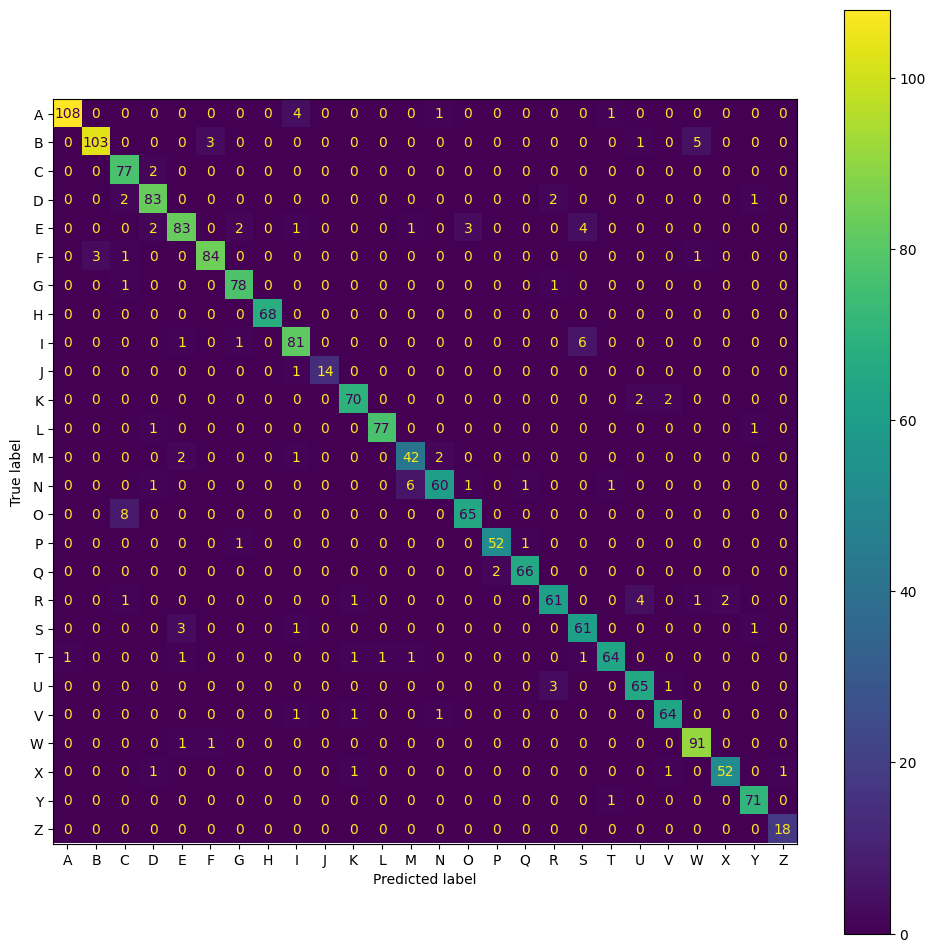

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

def evaluate_matrix(y_true, y_pred):
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.close(1) # don't display pre-sized matrix
    fig, ax = plt.subplots(figsize=(12, 12))
    disp.plot(ax=ax)
    print(classification_report(y_true, y_pred))
    plt.show()


evaluate_matrix(actual, preds)

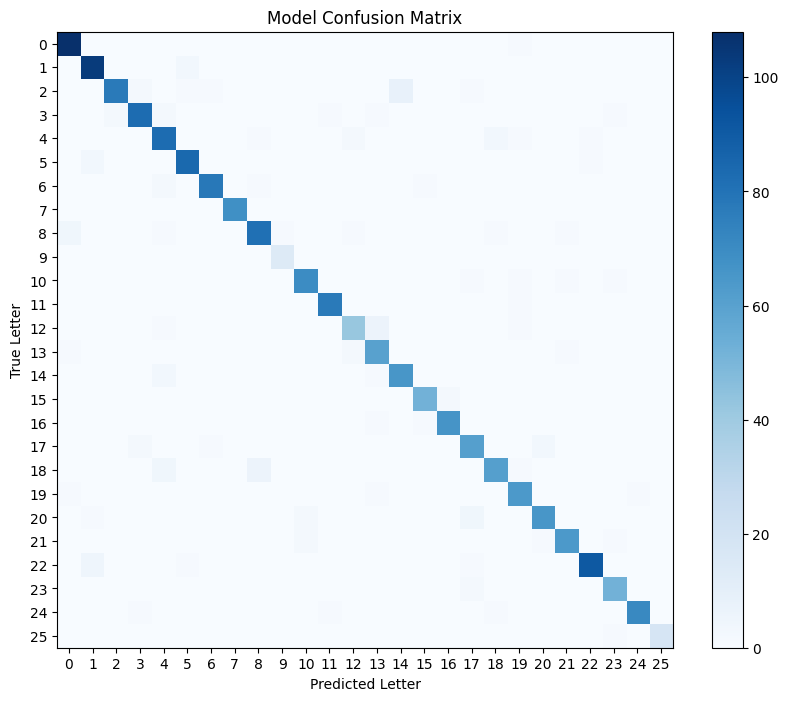

              precision    recall  f1-score   support

           A       0.95      0.99      0.97       109
           B       0.92      0.97      0.94       106
           C       0.97      0.86      0.91        90
           D       0.94      0.92      0.93        90
           E       0.86      0.91      0.89        91
           F       0.94      0.95      0.95        88
           G       0.97      0.95      0.96        82
           H       1.00      1.00      1.00        68
           I       0.91      0.90      0.91        90
           J       0.93      1.00      0.97        14
           K       0.95      0.95      0.95        74
           L       0.97      0.99      0.98        78
           M       0.89      0.84      0.87        50
           N       0.86      0.94      0.90        64
           O       0.89      0.94      0.92        69
           P       0.96      0.96      0.96        54
           Q       0.97      0.97      0.97        68
           R       0.87    

In [49]:
def evaluate_model(y_test, y_pred):
#     # Preditions on holdout test dataset
#     y_pred = model.predict(X_test)
#     y_pred = np.argmax(y_pred, axis=1)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=range(26), columns=range(26))
    plt.figure(figsize=(10, 8))
    plt.title('Model Confusion Matrix')
    plt.xlabel('Predicted Letter')
    plt.ylabel('True Letter')
    plt.xticks(range(26), labels=range(26))
    plt.yticks(range(26), labels=range(26))
    plt.imshow(cm_df, cmap='Blues')
    plt.colorbar()
    plt.show()
    
    # Calculate classification report
    report = classification_report(y_test, y_pred)
    print(report)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    print('Accuracy:', accuracy)

evaluate_model(preds, actual)